In [73]:
# library for: dataframe manipulation
import numpy as np
import pandas as pd

# library for: text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# library for visualization
import matplotlib.pyplot as plt

# library for: modelling
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# library for: metrics
from sklearn.metrics import accuracy_score

# library for: save model
import pickle

In [74]:
# Load Data
df = pd.read_csv("../datasets/sms_spam_collection.csv")
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [75]:
# cek distribusi label
df["label"].value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [76]:
# convert label to numeric
df["label"] = np.where(df["label"]=="spam", 1, 0)

In [77]:
# cek distribusi label
df["label"].value_counts(normalize=True)

label
0    0.865937
1    0.134063
Name: proportion, dtype: float64

# text preprocessing

In [78]:
# text preprocessing : lowercase

df["message"] = df["message"].apply(lambda x: x.lower())
df["message"]

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [79]:
# text preprocessing : remove non alphanumeric

df["message"] = df["message"].apply(lambda x: re.sub(r"[^A-Za-z0-9]", " ", x))
df["message"]

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [80]:
# text preprocessing : remove escape (backslash)

df["message"] = df["message"].apply(lambda x: re.sub(r"\'s", " ", x))
df["message"]

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [81]:
# text preprocessing : remove URL

df["message"] = df["message"].apply(lambda x: re.sub(r"http\S+", " link ", x))
df["message"]

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [82]:
# text preprocessing : remove numbers

df["message"] = df["message"].apply(lambda x: re.sub(r"\b\d+(?:\.\d+)?\b", "", x))
df["message"]

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in  a wkly comp to win fa cup final...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried  contact u ...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [83]:
# text preprocessing : remove punctuation

df["message"] = df["message"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df["message"]

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in  a wkly comp to win fa cup final...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried  contact u ...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [84]:
# text preprocessing : remove extra whitespace
df["message"] = df["message"].apply(lambda x: " ".join(x.split()))
df["message"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried contact u u...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [85]:
# text preprocessing : remove stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df["message"] = df["message"].apply(remove_stopwords)
df["message"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts 21s...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried contact u u pound prize claim e...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

# data splitting

In [86]:
# split data to train and test

x_train, x_test, y_train, y_test = train_test_split(
    df["message"],
    df["label"],
    stratify=df["label"],
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# tokenization

In [87]:
# define tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# fit on texts
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

# tokenize
train_sequence = tokenizer.texts_to_sequences(x_train)
test_sequence = tokenizer.texts_to_sequences(x_test)

In [88]:
# padding
train_padded = pad_sequences(train_sequence, maxlen=20)
test_padded = pad_sequences(test_sequence, maxlen=20)

# modelling

In [89]:
# define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# define optimizer and loss and metrics
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [90]:
# use callback to early stopping

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai > 98%!")
      self.model.stop_training = True
      
callbacks = myCallback()

## training

In [91]:
# training
history = model.fit(
    train_padded,
    y_train,
    epochs=30,
    validation_data=(test_padded, y_test),
    callbacks=[callbacks]
)

Epoch 1/30
140/140 [==============================] - 6s 21ms/step - loss: 0.3399 - accuracy: 0.8658 - val_loss: 0.2336 - val_accuracy: 0.8664
Epoch 2/30
140/140 [==============================] - 2s 17ms/step - loss: 0.1828 - accuracy: 0.9031 - val_loss: 0.1614 - val_accuracy: 0.9507
Epoch 3/30
140/140 [==============================] - 2s 18ms/step - loss: 0.1317 - accuracy: 0.9657 - val_loss: 0.1142 - val_accuracy: 0.9740
Epoch 4/30
140/140 [==============================] - 2s 17ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.1013 - val_accuracy: 0.9749
Epoch 5/30
140/140 [==============================] - 2s 17ms/step - loss: 0.0917 - accuracy: 0.9693 - val_loss: 0.0948 - val_accuracy: 0.9740
Epoch 6/30
140/140 [==============================] - 2s 17ms/step - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 7/30
140/140 [==============================] - 2s 17ms/step - loss: 0.0868 - accuracy: 0.9722 - val_loss: 0.0952 - val_accuracy: 0.9731

## evaluate model

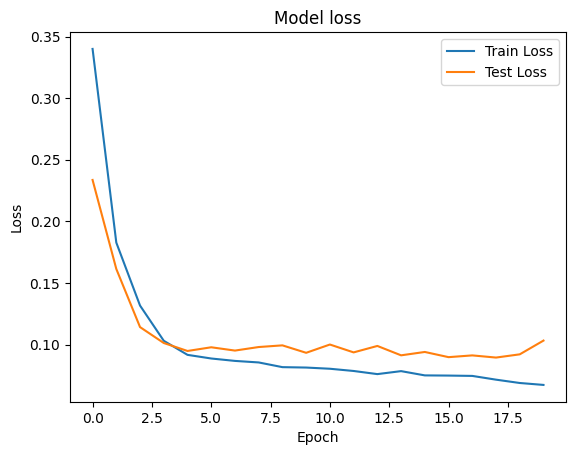

In [92]:
# Loss of Training and Testing

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', "Test Loss"], loc='upper right')
plt.show()

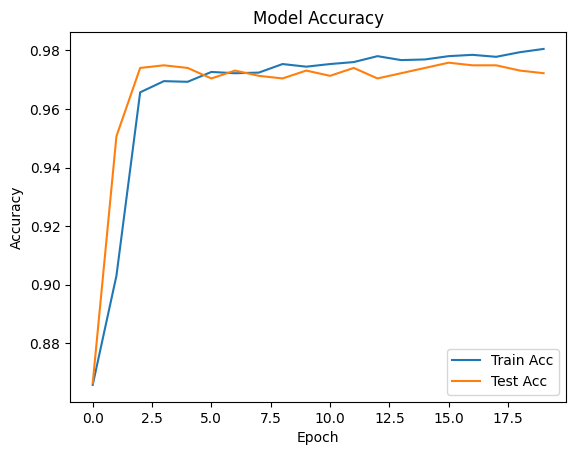

In [93]:
# accuracy training and testing

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', "Test Acc"], loc='lower right')
plt.show()

## predict new data

In [94]:
y_test = y_test.to_numpy().reshape(-1, 1)
y_test_pred = np.where(model.predict(test_padded)>0.5, 1, 0)

35/35 [==============================] - 1s 5ms/step


In [95]:
accuracy_score(y_test_pred, y_test)

0.9721973094170404

# save model

In [96]:
# save tokenizer
with open("../app/models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# save model
model.save("../app/models/sms_spam_prediction.keras")